# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# import the necessary libraries 
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

In [3]:
#loading the twitter-archive-enhanced data set
df_twitter = pd.read_csv("twitter-archive-enhanced.csv", dtype={"tweet_id": str})

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# import requests
import requests
import os

In [6]:
# create a directory for our file 
folder_name = 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
# getting the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r =requests.get(url, stream=True)

In [8]:
# saving the file to the local computer
with open('image_predictions.tsv', 'wb') as file:
          image_prediction = requests.get(url)
          file.write(image_prediction.content)
    

In [4]:
# load the image predictions data set
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [20]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
CONSUMER_KEY = "HIDDEN"
CONSUMER_SECRET = "HIDDEN"
ACCESS_TOKEN = "HIDDEN"
ACCESS_TOKEN_SECRET = "HI"

# Create an OAuthHandler instance

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)


In [9]:
missing_tweets = [] # a list to store the unretrieved tweetIDs 

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in df_twitter['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended') 
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets.append(tweet_id)

892420643555336193 - name 'api' is not defined
892177421306343426 - name 'api' is not defined
891815181378084864 - name 'api' is not defined
891689557279858688 - name 'api' is not defined
891327558926688256 - name 'api' is not defined
891087950875897856 - name 'api' is not defined
890971913173991426 - name 'api' is not defined
890729181411237888 - name 'api' is not defined
890609185150312448 - name 'api' is not defined
890240255349198849 - name 'api' is not defined
890006608113172480 - name 'api' is not defined
889880896479866881 - name 'api' is not defined
889665388333682689 - name 'api' is not defined
889638837579907072 - name 'api' is not defined
889531135344209921 - name 'api' is not defined
889278841981685760 - name 'api' is not defined
888917238123831296 - name 'api' is not defined
888804989199671297 - name 'api' is not defined
888554962724278272 - name 'api' is not defined
888202515573088257 - name 'api' is not defined
888078434458587136 - name 'api' is not defined
8877052893818

In [10]:
more_missing_tweets = [] # A list for the final unretrieved tweetIDs

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in missing_tweets:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            more_missing_tweets.append(tweet_id)

892420643555336193 - name 'api' is not defined
892177421306343426 - name 'api' is not defined
891815181378084864 - name 'api' is not defined
891689557279858688 - name 'api' is not defined
891327558926688256 - name 'api' is not defined
891087950875897856 - name 'api' is not defined
890971913173991426 - name 'api' is not defined
890729181411237888 - name 'api' is not defined
890609185150312448 - name 'api' is not defined
890240255349198849 - name 'api' is not defined
890006608113172480 - name 'api' is not defined
889880896479866881 - name 'api' is not defined
889665388333682689 - name 'api' is not defined
889638837579907072 - name 'api' is not defined
889531135344209921 - name 'api' is not defined
889278841981685760 - name 'api' is not defined
888917238123831296 - name 'api' is not defined
888804989199671297 - name 'api' is not defined
888554962724278272 - name 'api' is not defined
888202515573088257 - name 'api' is not defined
888078434458587136 - name 'api' is not defined
8877052893818

In [38]:
len(more_missing_tweets)

29

In [5]:
# Save tweet_json.txt to a data from

twt_list = []

json_file = open('tweet_json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        twt_list.append(twt)
    except:
        continue
        
json_file.close()


df_tweets = pd.DataFrame()

df_tweets['tweet_id'] = list(map(lambda tweet: tweet['id'], twt_list))
df_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], twt_list))
df_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], twt_list))


In [12]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6422 entries, 0 to 6421
Data columns (total 3 columns):
tweet_id          6422 non-null int64
retweet_count     6422 non-null int64
favorite_count    6422 non-null int64
dtypes: int64(3)
memory usage: 150.6 KB


## Assessing Data


### Assessing the twitter-archive-enhanced data set

In [10]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# viewing the info of the twitter archive
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [14]:
# view the first 5 rows of twitter archive
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# view the last 5 rows of twitter archive
df_twitter.tail().T

,2351,2352,2353,2354,2355
tweet_id,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN
timestamp,2015-11-16 00:24:50 +0000,2015-11-16 00:04:52 +0000,2015-11-15 23:21:54 +0000,2015-11-15 23:05:30 +0000,2015-11-15 22:32:08 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/666049248...,https://twitter.com/dog_rates/status/666044226...,https://twitter.com/dog_rates/status/666033412...,https://twitter.com/dog_rates/status/666029285...,https://twitter.com/dog_rates/status/666020888...


In [17]:
# getting a sample of the twitter archive
df_twitter.sample(5).T

,904,522,1174,2089,732
tweet_id,758355060040593408,809808892968534016,720059472081784833,670789397210615808,781524693396357120
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN
timestamp,2016-07-27 17:35:10 +0000,2016-12-16 17:14:20 +0000,2016-04-13 01:22:10 +0000,2015-11-29 02:20:29 +0000,2016-09-29 16:03:01 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Corey. He's a Portobello Corgicool. Tr...,RT @dog_rates: This is Maximus. His face is st...,This is Charleson. He lost his plunger. Looked...,Two obedient dogs here. Left one has extra leg...,Idk why this keeps happening. We only rate dog...
retweeted_status_id,NaN,7.93962e+17,NaN,NaN,NaN
retweeted_status_user_id,NaN,4.19698e+09,NaN,NaN,NaN
retweeted_status_timestamp,NaN,2016-11-02 23:45:19 +0000,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/758355060...,https://twitter.com/dog_rates/status/793962221...,https://twitter.com/dog_rates/status/720059472...,https://twitter.com/dog_rates/status/670789397...,https://twitter.com/dog_rates/status/781524693...


In [18]:
# checking for duplicates in the twitter archive
df_twitter.duplicated().sum()

0

In [19]:
# checking the statistical summary of the archive
df_twitter.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df_twitter.name.value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Name: name, dtype: int64

In [21]:
# missing data
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Assessing the  image predictions data set

In [13]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
# viewing the info of the image prediction data set
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# check for duplicated jpg_url duplicates
df_image_predictions.jpg_url.duplicated().sum()

66

In [24]:
# check for duplicates
df_image_predictions.duplicated().sum()

0

In [25]:
#missing data
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
# view first five rows of the data set
df_image_predictions.head().T

,0,1,2,3,4
tweet_id,666020888022790149,666029285002620928,666033412701032449,666044226329800704,666049248165822465
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
img_num,1,1,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd,Rhodesian_ridgeback,miniature_pinscher
p1_conf,0.465074,0.506826,0.596461,0.408143,0.560311
p1_dog,True,True,True,True,True
p2,collie,miniature_pinscher,malinois,redbone,Rottweiler
p2_conf,0.156665,0.0741917,0.138584,0.360687,0.243682
p2_dog,True,True,True,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound,miniature_pinscher,Doberman


In [27]:
#view the last five rows of the data set
df_image_predictions.tail().T

,2070,2071,2072,2073,2074
tweet_id,891327558926688256,891689557279858688,891815181378084864,892177421306343426,892420643555336193
jpg_url,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
img_num,2,1,1,1,1
p1,basset,paper_towel,Chihuahua,Chihuahua,orange
p1_conf,0.555712,0.170278,0.716012,0.323581,0.0970486
p1_dog,True,False,True,True,False
p2,English_springer,Labrador_retriever,malamute,Pekinese,bagel
p2_conf,0.22577,0.168086,0.078253,0.0906465,0.0858511
p2_dog,True,True,True,True,False
p3,German_short-haired_pointer,spatula,kelpie,papillon,banana


In [28]:
# descriptive statistics of the predictions
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
#view a sample of the data set 
df_image_predictions.sample(5).T

,923,1155,774,1520,745
tweet_id,702276748847800320,733109485275860992,689623661272240129,787810552592695296,687494652870668288
jpg_url,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,https://pbs.twimg.com/media/CYp4vFrVAAEs9AX.jpg
img_num,1,1,1,2,1
p1,Boston_bull,golden_retriever,toy_poodle,pug,Rottweiler
p1_conf,0.697303,0.945523,0.279604,0.362835,0.391471
p1_dog,True,True,True,True,True
p2,French_bulldog,Labrador_retriever,mashed_potato,French_bulldog,miniature_pinscher
p2_conf,0.239015,0.0423191,0.208564,0.221864,0.273595
p2_dog,True,True,False,True,True
p3,American_Staffordshire_terrier,doormat,Labrador_retriever,English_setter,Tibetan_mastiff


### Assessing the tweets data set

In [14]:
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6971,33680
1,892177421306343426,5274,29228
2,891815181378084864,3464,21975
3,891689557279858688,7192,36794
4,891327558926688256,7719,35188
5,891087950875897856,2586,17752
6,890971913173991426,1647,10334
7,890729181411237888,15684,56674
8,890609185150312448,3604,24432
9,890240255349198849,6072,27855


In [31]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6971,33680
1,892177421306343426,5274,29228
2,891815181378084864,3464,21975
3,891689557279858688,7192,36794
4,891327558926688256,7719,35188


In [15]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6422 entries, 0 to 6421
Data columns (total 3 columns):
tweet_id          6422 non-null int64
retweet_count     6422 non-null int64
favorite_count    6422 non-null int64
dtypes: int64(3)
memory usage: 150.6 KB


In [33]:
df_tweets.tail()

,tweet_id,retweet_count,favorite_count
6417,666049248165822465,36,88
6418,666044226329800704,115,246
6419,666033412701032449,36,100
6420,666029285002620928,39,112
6421,666020888022790149,419,2283


In [34]:
df_tweets.sample(5)

,tweet_id,retweet_count,favorite_count
800,769940425801170949,8799,29208
5665,686035780142297088,103,1059
5597,690021994562220032,922,2578
1996,671882082306625538,1204,3092
4975,757741869644341248,3014,6386


In [3]:
df_tweets.duplicated().sum()

4095

In [35]:
df_tweets.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues

1. correct the datatype for tweet_id to "string" not "int"
2. Replace 'None' with NaN to indicate the missing values

3. Create new columns for Day, Month, Year
4. Create new column for dog_stage and not the four different columns of dog types
5. Rename the 'a' in the names column with NaN
6. Drop some colums that are not needed
7. Standardize the ratings column to 10

8. The column names in the image pediction data frame are not descriptive.

9. The breeds in image prediction are not consistent as there is a mix up of both lowercase and upper case letters

10. Drop duplicates values from jpg_url 

11. Drop duplictaes from the tweets data frame

### Tidiness issues
1. Create one column to put all the dog types instead of the 4 different columns

2. Combine the three different data frames into one data set.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
df_twitter_clean = df_twitter.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweets_clean = df_tweets.copy()

In [32]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [35]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6422 entries, 0 to 6421
Data columns (total 3 columns):
tweet_id          6422 non-null int64
retweet_count     6422 non-null int64
favorite_count    6422 non-null int64
dtypes: int64(3)
memory usage: 150.6 KB


## issue

### Define

> drop the retweets and only keep the original tweets

### Code

In [9]:
# exclude all the retweets by filtering them out
df_twitter_clean = df_twitter_clean[df_twitter_clean['retweeted_status_user_id'].isnull()]

### Test

In [10]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

## Issue 1: 

### Define

>correct the datatype for tweet_id to "string" not "int"

### Code

In [11]:
# convert the tweet_id to string
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype('str')
df_image_predictions_clean['tweet_id'] = df_image_predictions_clean['tweet_id'].astype('str')
df_tweets_clean['tweet_id'] = df_tweets_clean['tweet_id'].astype('str')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Test

In [12]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

In [13]:
df_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [14]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6422 entries, 0 to 6421
Data columns (total 3 columns):
tweet_id          6422 non-null object
retweet_count     6422 non-null int64
favorite_count    6422 non-null int64
dtypes: int64(2), object(1)
memory usage: 150.6+ KB


## Issue 2: 

### Define

- Replace 'None' with NaN to indicate the missing values
- Rename the 'a' in the names column with NaN

### Code

In [15]:
# Replace the None values with NaN
df_twitter_clean.replace("None", np.nan, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [16]:
# drop the 'a' 
for x in df_twitter_clean['name']:
    if x == "a":
        df_twitter_clean.name=df_twitter_clean.name.replace('a',np.nan)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
# change 'None' to be NaN, np.nan
df_twitter_clean['name'] = df_twitter_clean['name'].replace('None', np.nan)
# Capitalize all first letters
df_twitter_clean['name'] = df_twitter_clean['name'].str.capitalize()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Test

In [18]:
df_twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2240,667924896115245057,NaN,NaN,2015-11-21 04:37:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,NaN,NaN,NaN,NaN
685,788150585577050112,NaN,NaN,2016-10-17 22:51:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a golden chow. Rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788150585...,13,10,Leo,NaN,NaN,NaN,NaN
547,805520635690676224,NaN,NaN,2016-12-04 21:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke the Wonder Dog. He never let that...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805520635...,13,10,Zeke,NaN,NaN,NaN,NaN
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,NaN,NaN,NaN,NaN,NaN
267,841680585030541313,NaN,NaN,2017-03-14 16:01:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,NaN,NaN,NaN,NaN


## Tiddines Issue

### Define

> Create new column for dog_stage and not the four different columns of dog types

### Code

In [19]:

df_twitter_clean['dog_stage'] = df_twitter_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df_twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,NaN


In [21]:
df_twitter_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

### Test

In [22]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1440 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dog_stage                     364 non-null 

## Issue 3: 

### Define

> Create new columns for day, Month, Year

### Code

In [23]:
#convert timestamp to datetime
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

#extract year, month and day to new columns
df_twitter_clean['year'] = df_twitter_clean['timestamp'].dt.year
df_twitter_clean['month'] = df_twitter_clean['timestamp'].dt.month
df_twitter_clean['weekday'] = df_twitter_clean['timestamp'].dt.day_name()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

### Test

In [24]:
df_twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,year,month,weekday
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,10,NaN,NaN,NaN,NaN,NaN,NaN,2015,11,Monday
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,10,NaN,NaN,NaN,NaN,NaN,NaN,2015,11,Monday
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,10,NaN,NaN,NaN,NaN,NaN,NaN,2015,11,Sunday
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,10,NaN,NaN,NaN,NaN,NaN,NaN,2015,11,Sunday
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,10,NaN,NaN,NaN,NaN,NaN,NaN,2015,11,Sunday


### Issue 5:

### Define:

>  Standardize the ratings column to 10

### Code

In [25]:
# use for loop to set df_twitter_clean.rating_denominator rate to 10

for x in df_twitter_clean.rating_denominator:
    df_twitter_clean.rating_denominator=10.0

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Test

In [26]:
# check if there is still a rating more than 10
sum(df_twitter_clean.rating_denominator>10.0)

0

## Issue 6:

### Define

> Drop some columns that are not needed

### Code

In [48]:
drop_col = ['retweeted_status_id', 
            'retweeted_status_user_id', 
            'retweeted_status_timestamp', 
            'timestamp',
            'text',
            'in_reply_to_status_id',
            'in_reply_to_user_id','expanded_urls',
            'source','doggo','floofer','pupper','puppo'
]
df_twitter_clean.drop(drop_col, 1, inplace=True)


In [51]:
# Drop the img_num column in the image prediction data frame
df_image_predictions_clean.drop('img_num', 1, inplace=True)

### Test

In [52]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null float64
name                  1440 non-null object
dog_stage             364 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
weekday               2175 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 152.9+ KB


In [53]:
df_twitter_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday
0,892420643555336193,13,10.0,Phineas,NaN,2017,8,Tuesday
1,892177421306343426,13,10.0,Tilly,NaN,2017,8,Tuesday
2,891815181378084864,12,10.0,Archie,NaN,2017,7,Monday
3,891689557279858688,13,10.0,Darla,NaN,2017,7,Sunday
4,891327558926688256,12,10.0,Franklin,NaN,2017,7,Saturday


In [54]:
list(df_image_predictions_clean)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

## Issue 7:

### Define

> The column names in the image pediction data frame are not descriptive

### Code

In [55]:
df_image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace=True)

### Test

In [56]:
list(df_image_predictions_clean)

['tweet_id',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

## Issue 8:

### Define

> The breeds in image prediction are not consistent as there is a mix up of both lowercase and upper case letters 

### Code

In [57]:
# Use uppercase letters for consistency
df_image_predictions_clean['first_prediction'] = df_image_predictions_clean['first_prediction'].str.capitalize()
df_image_predictions_clean['second_prediction'] = df_image_predictions_clean['second_prediction'].str.capitalize()
df_image_predictions_clean['third_prediction'] = df_image_predictions_clean['third_prediction'].str.capitalize()

### Test

In [58]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue 9:

### Define

> Drop duplicates values from jpg_url

### Code

In [59]:
df_image_predictions_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

### Test

In [60]:
df_image_predictions_clean.jpg_url.duplicated().sum()

0

## Issue 10:

### Define

> Drop duplictaes from the tweets data frame

### Code

In [61]:
df_tweets_clean.drop_duplicates(keep=False, inplace=True)

### Test

In [62]:
df_tweets_clean.duplicated().sum()

0

#### tidiness Issue : Combine the three different data frames into one data set.

### Define


> Merge the three different data frames to one data set

### Code

In [8]:
merged_tw = pd.merge(df_twitter_clean, df_image_predictions_clean, how = 'inner', on = ['tweet_id'])
merged_tw = pd.merge(merged_tw, df_tweets_clean, how = 'inner', on = ['tweet_id'])

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

### Test

In [64]:
merged_tw.sample(5)

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
272,825876512159186944,11,10.0,Mo,NaN,2017,1,Monday,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,Shopping_cart,0.995941,False,Shopping_basket,0.004057,False,Mousetrap,8.832830e-07,False,1733,9901
235,831939777352105988,12,10.0,Emanuel,doggo,2017,2,Wednesday,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,Pomeranian,0.153862,True,Marmot,0.091234,False,Grey_fox,9.064410e-02,False,5644,22434
300,820690176645140481,84,10.0,NaN,NaN,2017,1,Sunday,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West_highland_white_terrier,0.872064,True,Kuvasz,0.059526,True,Samoyed,3.739960e-02,True,2990,11558
877,694206574471057408,10,10.0,NaN,NaN,2016,2,Monday,https://pbs.twimg.com/media/CaJRMPQWIAA1zL9.jpg,Shih-tzu,0.352547,True,Toy_poodle,0.155720,True,Maltese_dog,1.166570e-01,True,1848,3811
816,704480331685040129,11,10.0,Lucia,NaN,2016,3,Tuesday,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_fox,6.438090e-03,False,978,3143


In [65]:
#no need for data after 01-Aug-2017
merged_tw.sort_values(by=['year','month','weekday'])

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
1178,667832474953625600,12,10.0,NaN,NaN,2015,11,Friday,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,Miniature_pinscher,0.214200,True,Bath_towel,0.146789,False,Chihuahua,0.104152,True,54,254
1179,667832474953625600,12,10.0,NaN,NaN,2015,11,Friday,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,Miniature_pinscher,0.214200,True,Bath_towel,0.146789,False,Chihuahua,0.104152,True,54,255
1180,667724302356258817,7,10.0,NaN,NaN,2015,11,Friday,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,Ibex,0.619098,False,Bighorn,0.125119,False,Ram,0.074673,False,267,422
1181,667724302356258817,7,10.0,NaN,NaN,2015,11,Friday,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,Ibex,0.619098,False,Bighorn,0.125119,False,Ram,0.074673,False,267,421
1182,667524857454854144,12,10.0,NaN,NaN,2015,11,Friday,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,Hare,0.447893,False,Dhole,0.092435,False,Chesapeake_bay_retriever,0.088122,True,964,1496
1183,667524857454854144,12,10.0,NaN,NaN,2015,11,Friday,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,Hare,0.447893,False,Dhole,0.092435,False,Chesapeake_bay_retriever,0.088122,True,963,1496
1138,671390180817915904,7,10.0,NaN,NaN,2015,11,Monday,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,Zebra,0.997673,False,Tiger,0.000837,False,Prairie_chicken,0.000575,False,651,1279
1139,671390180817915904,7,10.0,NaN,NaN,2015,11,Monday,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,Zebra,0.997673,False,Tiger,0.000837,False,Prairie_chicken,0.000575,False,651,1278
1140,671154572044468225,11,10.0,Holly,NaN,2015,11,Monday,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,Labrador_retriever,0.495047,True,Chesapeake_bay_retriever,0.350188,True,Golden_retriever,0.142400,True,186,622
1141,671154572044468225,11,10.0,Holly,NaN,2015,11,Monday,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,Labrador_retriever,0.495047,True,Chesapeake_bay_retriever,0.350188,True,Golden_retriever,0.142400,True,186,623


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [7]:
# save and store new data set in csv
merged_tw.to_csv('master_twitter_df.csv',index=False, encoding = 'utf-8')

NameError: name 'merged_tw' is not defined

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
df_clean = pd.read_csv('master_twitter_df.csv')
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,year,month,weekday,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count
0,892420643555336193,13,10.0,Phineas,NaN,2017,8,Tuesday,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6971,33680
1,892420643555336193,13,10.0,Phineas,NaN,2017,8,Tuesday,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,6970,33698
2,892177421306343426,13,10.0,Tilly,NaN,2017,8,Tuesday,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5274,29228
3,891815181378084864,12,10.0,Archie,NaN,2017,7,Monday,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3464,21975
4,891689557279858688,13,10.0,Darla,NaN,2017,7,Sunday,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,7192,36794


In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 20 columns):
tweet_id              1198 non-null int64
rating_numerator      1198 non-null int64
rating_denominator    1198 non-null float64
name                  870 non-null object
dog_stage             204 non-null object
year                  1198 non-null int64
month                 1198 non-null int64
weekday               1198 non-null object
jpg_url               1198 non-null object
first_prediction      1198 non-null object
first_confidence      1198 non-null float64
first_dog             1198 non-null bool
second_prediction     1198 non-null object
second_confidence     1198 non-null float64
second_dog            1198 non-null bool
third_prediction      1198 non-null object
third_confidence      1198 non-null float64
third_dog             1198 non-null bool
retweet_count         1198 non-null int64
favorite_count        1198 non-null int64
dtypes: bool(3), float64(4), int64(6), obje

### Insights:
1. Which was the most popular breed of Dog?
2. What is the distribution of the favorite_count and retweet_count?
3. What was the correlation between the favorite_count and retweet_count?
4. Which is the most liked tweet?
5. Was there an increase in the number of twitter users from the period 2015 - 2017?
6. What are the dog_stage ratios?

### Visualization

#### Popular dog breed

Text(0.5,1,'Popular Dog Breeds')

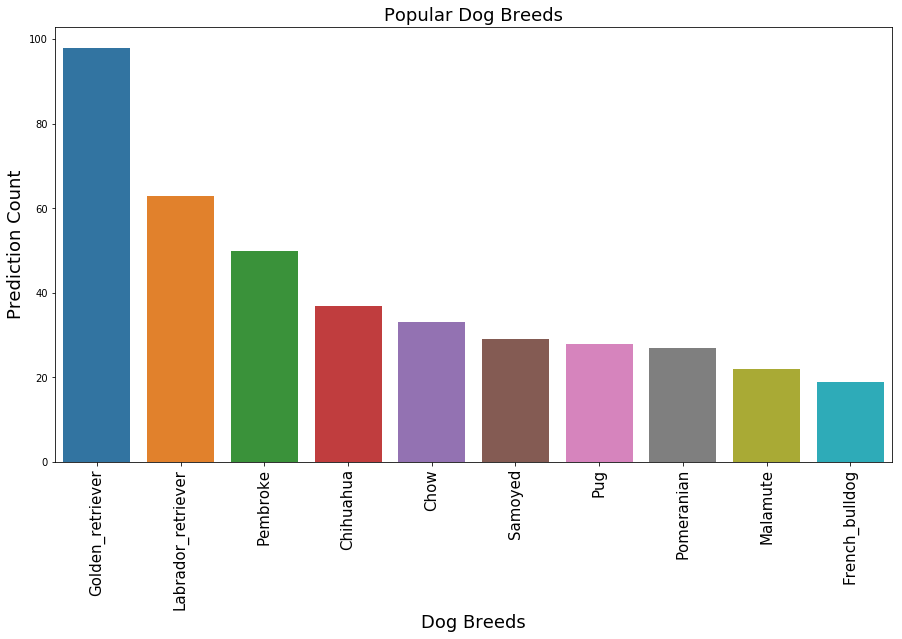

In [70]:

plt.figure(figsize = (15,8))
ax = sns.barplot(x = df_clean['first_prediction'].value_counts()[0:10].index,
            y = df_clean['first_prediction'].value_counts()[0:10],
            data = df_clean);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18)

- from the bar graph, it is right to assume that Golden retriever was the most popular dog breed
- The French_bulldog was the least popular breed

#### Retweet Count Vs Favorite count(distribution)

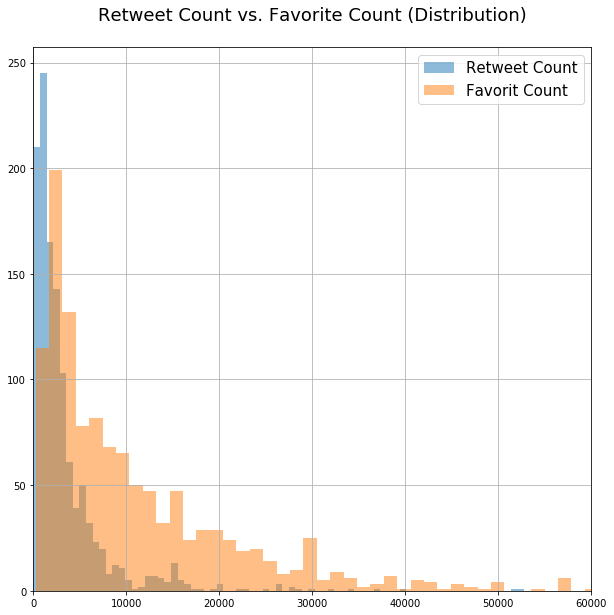

In [71]:
plt.figure(figsize=(10,10))
df_clean.retweet_count.hist(alpha=0.5, bins=100, label='Retweet Count')
df_clean.favorite_count.hist(alpha=0.5, bins=100, label='Favorit Count')
plt.title('Retweet Count vs. Favorite Count (Distribution)\n', size = 18)
plt.legend(loc='upper right', fontsize = 15)
plt.xlim(0,60000)
plt.show()

In [60]:
df_clean.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1198.000000,1198.000000
mean,3523.015025,11894.513356
std,5151.793783,14179.794759
min,54.000000,254.000000
25%,965.500000,3019.750000
50%,2021.000000,7355.500000
75%,3902.000000,15268.750000
max,70351.000000,144286.000000


- From the histogram, we notice that both the retweet count and favorite count are skewed to the right. 
- However, the mean of the favorite count(11,894.51) is greater than that of retweet count(3523.02)
- The maximum number of favorite a tweet received was 144286 while the maximum retweets a tweet received was 70351

#### Retweet Count Vs Favorite count(correlation)

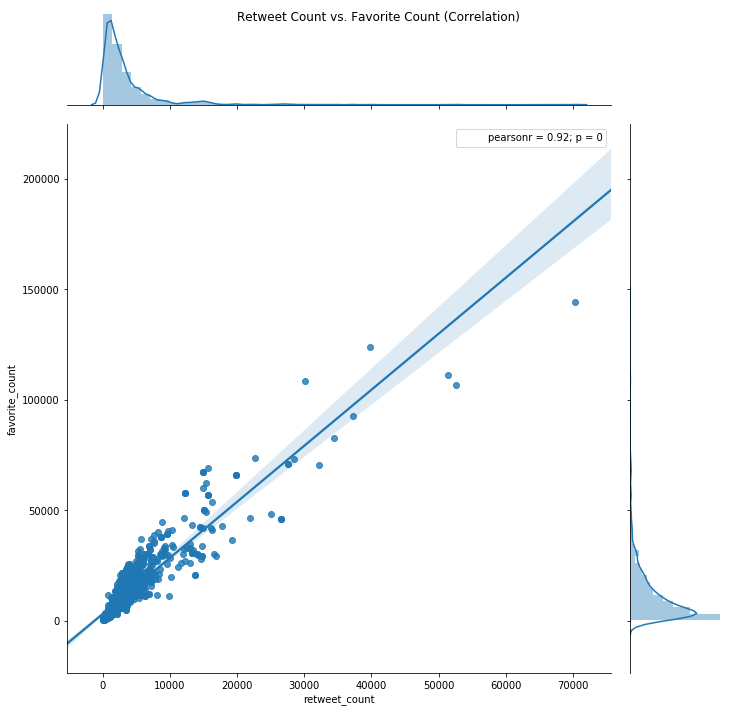

In [72]:
n = sns.jointplot(x=df_clean.retweet_count,y=df_clean.favorite_count, size=10, kind='reg');
n.fig.suptitle('Retweet Count vs. Favorite Count (Correlation)\n');

From the above plot, we can deduce that there is a positive correlation between the favorite counts and retweet counts

#### Twitter Users population change

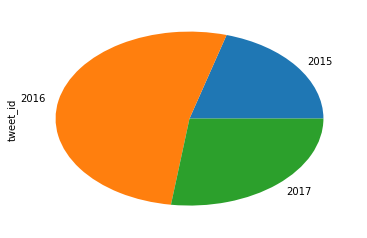

In [73]:
# Twitter user increase in 2016 and cringe in 2017 at WeRatingDos
df_clean.groupby("year")['tweet_id'].count().plot(kind='pie');

In [74]:
df_clean.groupby("year")['tweet_id'].count().sort_values(ascending=False)

year
2016    626
2017    326
2015    246
Name: tweet_id, dtype: int64

From the above statistics, we can see the number of twitter users declined in 2017(326) from the initial high of (626) in 2016

#### Most liked tweet

In [75]:
#which tweet id and photo got the most 'likes'
most_liked = df_clean.sort_values('favorite_count',ascending=False);
most_liked = most_liked[['tweet_id','favorite_count','jpg_url','dog_stage','first_prediction']]
most_liked.head()

,tweet_id,favorite_count,jpg_url,dog_stage,first_prediction
643,744234799360020481,144286,https://pbs.twimg.com/ext_tw_video_thumb/74423...,doggo,Labrador_retriever
282,822872901745569793,123700,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,puppo,Lakeland_terrier
354,807106840509214720,111226,https://pbs.twimg.com/ext_tw_video_thumb/80710...,NaN,Chihuahua
110,866450705531457537,108529,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,pupper,French_bulldog
669,739238157791694849,106819,https://pbs.twimg.com/ext_tw_video_thumb/73923...,doggo,Eskimo_dog


From the above, we can see that the Labrador_retriever with tweet_id(744234799360020481) was the most liked tweet

#### Dog stage ratios

<Container object of 4 artists>

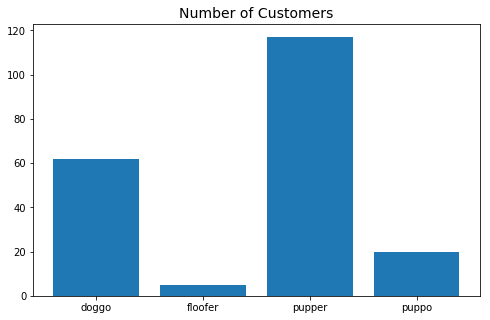

In [77]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=df_clean['dog_stage'].value_counts().index, 
        height=df_clean.dog_stage.value_counts().values)

From the bar graph:
- Pupper was the most popular dog stage
- floofer was the least popular dog stage